# Sheridan Kamal

## DATA 73500 - Assignment 4 (Due 3/16/20 or 3/23/20, 6:30p)

### Purpose
The purpose of this notebook is to provide a tutorial for a novice user on how to import data files, create dataframes, create new variables from existing ones, group variables, and how to create a simple visualization. 

### Information about the Data
Using the Gapminder website, I downloaded two datasets, which I combined for this tutorial: 
1. Arms Exports (1990 US dollars, inflation-adjusted) (https://data.worldbank.org/indicator/MS.MIL.XPRT.KD) 
2. Arms Imports (1990 US dollars, inflation-adjusted) (https://data.worldbank.org/indicator/MS.MIL.MPRT.KD)

These datasets were chosen because it comes directly from the World Bank and because of the fact that it is inflation-adjusted and in the same currency making comparison between countries easier.

To create a single dataset for use in this tutorial, I used Tableau (because it was faster and simpler to do so) to perform a full outer join on the two datasets with respect to the "year" and "country" of the two datasets. I then inspected the resulting dataset in Excel (after downloading the resulting file as a CSV) so that I could preserve one column of "country" and "year" (which happened to be the columns from the "Arms Imports" dataset with one additional country that was found in the "Arms Exports" dataset and it's corresponding years).

In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv('Arms Exports and Imports.csv').fillna(value = 0)

Before all else we must import the libraries we are going to use (we can also give them an alias to avoid having to write the entire name of the library everytime we want to use it). We must then determine the format of the data file we want to read by looking at the properties of the file which will tell us the type of the file (csv, excel, json, etc.). This can also be done by looking at the file extension at the end of the file name (.csv, .xlsx, .json, etc.).

The code following the import of the libraries is used to read in the CSV dataset as a dataframe and call it "data" with an additional step to fill in any missing values with 0. It was necessary to fill in the missing values with 0 in this case so we can perform operations on the columns and that cannot be done if the columns contain null or NaN values.

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10788 entries, 0 to 10787
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  10788 non-null  object 
 1   Year     10788 non-null  int64  
 2   Exports  10788 non-null  float64
 3   Imports  10788 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 337.2+ KB


This step is used as a test of data validity to make sure the Dtype (data type) of the data is in the types that I wanted to use for my exploration. Only the variable "Country" matched the desired Dtype so we must convert the other variables to the Dtypes we need.

In [3]:
data['Year'] = pd.to_datetime(data['Year'], format = '%Y') #Date set to first day of the year per UNIX convention
data['Exports'] = data['Exports'].astype('int64')
data['Imports'] = data['Imports'].astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10788 entries, 0 to 10787
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Country  10788 non-null  object        
 1   Year     10788 non-null  datetime64[ns]
 2   Exports  10788 non-null  int64         
 3   Imports  10788 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 337.2+ KB


This step is used to convert "Year" to datetime, and "Exports" and "Imports" to int64. "Exports" and "Imports" could have remained as float64, but despite the fact that they represent currency data it is all whole numbers and there is no need for the decimal or following zeros. 

In [4]:
data.head()

,Country,Year,Exports,Imports
0,Afghanistan,1960-01-01,0,40000000
1,Afghanistan,1961-01-01,0,56000000
2,Afghanistan,1962-01-01,0,64000000
3,Afghanistan,1963-01-01,0,40000000
4,Afghanistan,1964-01-01,0,56000000


This step is used to look at the first five data entries of the dataframe. As you may have noticed, the data index begins at 0 not 1. This is very important to keep in mind especially if you want to index rows or columns since indexing begins at 0 in Python.

In [5]:
data.corr()

,Exports,Imports
Exports,1.000000,0.105848
Imports,0.105848,1.000000


This step is used to look at the correlation coefficient between "Exports" and "Imports". This is a useful step if you will be creating a regression model and can be use as a check to avoid multicollinearity issues.

In [6]:
data['Trade Balance'] = data['Exports'] - data['Imports']
data.head()

,Country,Year,Exports,Imports,Trade Balance
0,Afghanistan,1960-01-01,0,40000000,-40000000
1,Afghanistan,1961-01-01,0,56000000,-56000000
2,Afghanistan,1962-01-01,0,64000000,-64000000
3,Afghanistan,1963-01-01,0,40000000,-40000000
4,Afghanistan,1964-01-01,0,56000000,-56000000


This step is used to create a new column in "data" called "Trade Balance" by calculating the difference between the existing "data" columns "Exports" and "Imports". 

This calculation was not chosen at random. Exports and Imports could be used to determine the Balance of Trade. This balance of trade could then be used to determine if a country had a trade deficit (more imports than exports) or a trade surplus (more exports than imports). The balance of trade is important because it is a significant component of the balance of payments, which helps to determine the direction of economic growth.

In [7]:
group = data.groupby('Year')
df = pd.DataFrame()
df['International Exports'] = group['Exports'].sum()
df['International Imports'] = group['Imports'].sum()
df['International Trade Balance'] = group['Trade Balance'].sum()
df.head()

,International Exports,International Imports,International Trade Balance
Year,,,
1960-01-01,10396000000,15183000000,-4787000000
1961-01-01,9824000000,14947000000,-5123000000
1962-01-01,9539000000,15212000000,-5673000000
1963-01-01,12692000000,17185000000,-4493000000
1964-01-01,17067000000,23313000000,-6246000000


In this step, we are grouping the data by "Year" and creating grouped versions of the variables. I know that the code looks a bit daunting so let's break it down:
1. Use our data (with the newly created "Trade Balance" column) to group each variable by "Year", which in turn sets the index as "Year", and storing the resulting dataframe as "group".
2. Create an empty dataframe and calling it "df".
3. Create a column in "df" called "International Exports" that is equal to the sum of the "Exports" column in "group" by year. This means that for each year, "Exports" is equal to the sum of the exports of all countries.
4. Create a column in "df" called "International Imports" that is equal to the sum of the "Imports" column in "group" by year. This means that for each year, "Imports" is equal to the sum of the imports of all countries.
5. Create a column in "df" called "International Trade Balance" that is equal to the sum of the "Trade Balance" column in "group" by year. This means that for each year, "Trade Balance" is equal to the sum of the trade balance of all countries.
6. Look at the first five years of our created dataframe.

<IPython.core.display.Javascript object>


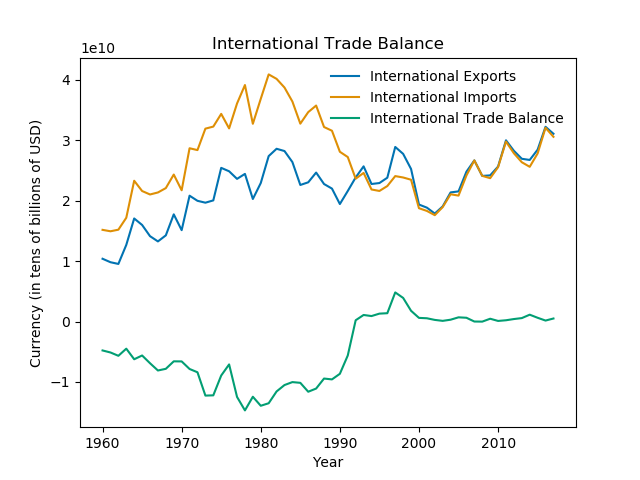

In [8]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(err_style = None, data = df, palette = "colorblind", dashes = False)
plt.title("International Trade Balance")
plt.ylabel("Currency (in tens of billions of USD)")
plt.legend(loc = 'upper right', frameon = False)

The above code is used to create a multi-line chart of the "International Exports", "International Imports", and "International Trade Balance" over time. Again, this code might seem complex so let's break it down:
1. This code must be included of we want our figure to appear in the notebook, specifically because we are using the matplotlib and seaborn libraries. This is in fact a variation of the code normally used that also allows us to resize the figure in the notebook and gives us the value of the point where the cursor lands on the figure.
2. This library is imported and given an alias so that we may add plot elements to the seaborn plot.
3. This library is imported and given an alias so that we can create the line plot in seaborn.
4. Create a line plot: without error bars, using the "df" dataframe, using the "colorblind" color palette, and with solid lines. Since this dataframe has an index, seaborn recognizes the index to be the X variable and takes the other columns as y variables to create a multi-line plot with a color-coded legend. If we only wanted one line then the y variable would have to be declared as the column you wish to plot.
5. Create a title for the figure.
6. Create a y axis label for the figure.
7. Set the location for the legend within the figure and remove the frame around the legend.

You've reached the end of the tutorial! By now, you should know how to import libraries and alias them, figure out the format of your data, how to import data, inspect data, convert between data types, create new variables and new dataframes, group data by a variable, and how to create a line chart using seaborn and add plot elements using matplotlib.pyplot.